# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('D:/DataScienceFoundation/SpringBoard/miniProject/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\EliEm\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


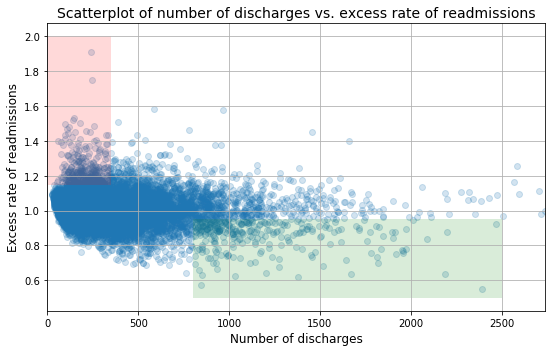

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

###  A. Do you agree with the above analysis and recommendations? Why or why not?

#### A. Initial observations based on the plot above
- Overall, rate of readmissions is trending down with increasing number of discharges
- With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
- With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)


- The analysis is good starting point but it does not provide very deep and robust analysis.it doesn't seem the data has been checked and if the outlier data is valid or should be discarded. Also, the scatterplot does not provide a clear trend or provide any correlation analysis. It is a scatterplot with over 10,000 points which makes it difficult to discern any real trends. The clustering of many points in those regions make these statements difficult to approve.



#### B. Statistics

- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 59% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [16]:
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [20]:
df=df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                         'Number of Readmissions'])
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [22]:
df = clean_hospital_read_df

df_less_100  = df[df['Number of Discharges'] < 100 ]
df_gt_1000 = df[df['Number of Discharges'] > 1000]

mean_read_rate_lt_100  = df_lt_100 ['Excess Readmission Ratio'].mean()
mean_read_rate_gt_1000 = df_gt_1000['Excess Readmission Ratio'].mean()

lt_100_count  = len(df_less_100)
gt_1000_count = len(df_gt_1000)

num_lt_100_read_gt_1  = len(df_lt_100 [df_lt_100 ['Excess Readmission Ratio'] > 1])
num_gt_1000_read_gt_1 = len(df_gt_1000[df_gt_1000['Excess Readmission Ratio'] > 1])

excess_rate_lt_100  = num_lt_100_read_gt_1  / lt_100_count * 100.0 
excess_rate_gt_1000 = num_gt_1000_read_gt_1 / gt_1000_count* 100.0

print('When num of discharges %s, mean excess readmission rate is %.3f and %i%% have excess readmission rate greater than 1.' 
      % ('<  100', mean_read_rate_lt_100, excess_rate_lt_100))
print('When num of discharges %s, mean excess readmission rate is %.3f and %i%% have excess readmission rate greater than 1.' 
      % ('> 1000', mean_read_rate_gt_1000, excess_rate_gt_1000))

When num of discharges <  100, mean excess readmission rate is 1.023 and 59% have excess readmission rate greater than 1.
When num of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.


#### C. Conclusions

- There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


#### To prove for significant correlation between the hospital capacity (number of discharges) and readmission rates, we have to calculate the correlation as following:

In [12]:
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


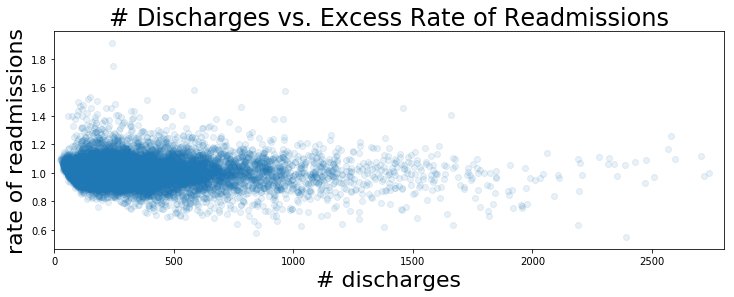

In [25]:
plt.figure(figsize=(12, 4))
plt.scatter(x=df['Number of Discharges'], y=df['Excess Readmission Ratio'], alpha = .1)
plt.xlim(0,2800)
plt.xlabel('# discharges', fontsize=22)
plt.ylabel('rate of readmissions', fontsize=22)
plt.title('# Discharges vs. Excess Rate of Readmissions', fontsize=24)

plt.show();


#### The correlation between hospital capacity (number of discharges) and readmission rates is around -0.09 which is small

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1.Setup an appropriate hypothesis test.

- H0: 'Number of Discharges' and 'Excess Readmission Ratio' are uncorrelated
- Ha: 'Number of Discharges' and 'Excess Readmission Ratio' are not uncorrelated

#### 2. Compute and report the observed significance value (or p-value).

In [27]:

# calculate the correlation coefficient
r = np.corrcoef(df['Number of Discharges'],  df['Excess Readmission Ratio'])[0][1]
r

nan

In [29]:
##  Drop the nan value of the Excess Readmission Ratio
data = clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'])

In [30]:
number_discharge = data['Number of Discharges']
excess_readmission = data['Excess Readmission Ratio']

mean, mean_h0 = np.corrcoef(number_discharge, excess_readmission)[0, 1], 0
n = len(data['Number of Discharges'])

print('Mean of Coefficient between Number of Dischaged and Excess Readmission Ratio is %.2e' %(mean))

Mean of Coefficient between Number of Dischaged and Excess Readmission Ratio is -9.74e-02


In [31]:
#standard error
standard_error = np.sqrt((1-mean**2)/(n-2))
z = (mean-mean_h0)/standard_error

p = 2*stats.norm.cdf(z)



print('Standard Error (SE) = %.2e' %standard_error)
print('z-statistics value = %.4f' %z)
print('p-value using z-statistics = %.2e' %p)

Standard Error (SE) = 9.28e-03
z-statistics value = -10.4924
p-value using z-statistics = 9.36e-26


In [32]:
confidence=99

#Using stats.norm.ppf  -- Percent Point Function
margin_of_error = stats.norm.ppf(0.5+confidence/200)*standard_error
confidence_interval = [mean-margin_of_error, mean+margin_of_error]

print('Margin of Error = %.2e' %margin_of_error)
print('Confidence interval is between %.3f and %.3f' %(confidence_interval[0], confidence_interval[1]))

Margin of Error = 2.39e-02
Confidence interval is between -0.121 and -0.073


#### 3. Statistical Significance for $\alpha - 0.01$

- Since the p_value ($9.36 \times 10^{-26}$) is less than the α=0.01, we can reject the null hypothesis and accept the alternative hypothesis

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

- Based on above statistic analysis since p-value is less than the alpha value, then we reject the null hypothesis which was "'Number of Discharges' and 'Excess Readmission Ratio' are uncorrelated". In addition the confidence interval is between -0.121 and -0.073 and excludes zero, then we can claim that there is correlation between two paramater. However, practically, the correlation between two parameters is very small. 
- It is not practical to assume that hospitals with smaller number of dischrages will always have a higher excess readmission ratio. Then, I will not recommend that hospitals with smaller capacity be required to upgrade their resources.

#### 5.Look at the scatterplot above.

- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.


- The scatter plot can be used to display the dependecy between variables and caputering the density of points. In the above plot, it indicate there is dependecy between the 'Number of Discharges' and 'Excess Readmission Ratio'. But as we figured it out, the dependency is not significant.
- The polyfit can describe the dependecy between two variables clear. It dispaly the line fit for datasets and indicate the dependency is not that significant. 

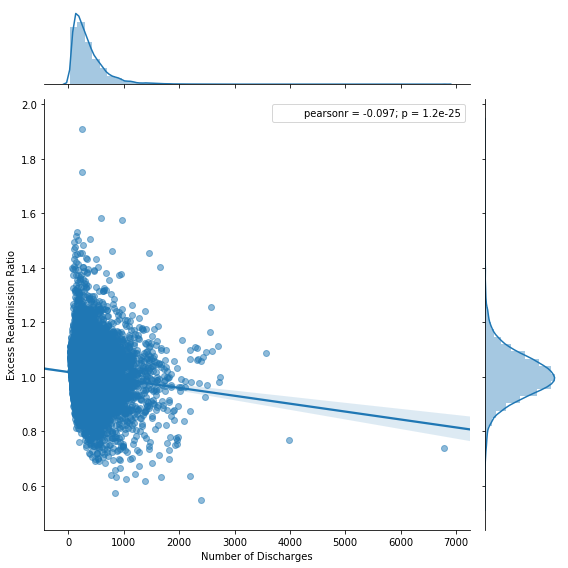

In [44]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind = 'reg', size = 8, scatter_kws = {'alpha' : 0.5})

In [63]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as pp

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [64]:
data = data[data['Excess Readmission Ratio']>1]
data['Ratio'] = data['Excess Readmission Ratio']
data['Discharges'] = data ['Number of Discharges']

In [74]:
#color = ['No','skyblue','coral']
jitter = 0.05*(np.random.rand(len(data)) - 0.5)
def plotfit(fit):
    pp.scatter(data['Ratio'],data['Discharges'] + jitter,c="coral",linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(data['Ratio'],fit.predict(data),c="coral",linewidth=0.2,edgecolor='gray',marker='d')

In [83]:
ols_group_ratio = smf.ols('Discharges ~ Ratio ',data=data).fit()

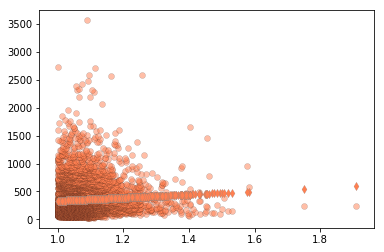

In [84]:
plotfit(ols_group_ratio)

In [85]:
ols_group_ratio.params

Intercept     45.615373
Ratio        284.259804
dtype: float64